In [4]:
from IPython.display import HTML

In [5]:
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [6]:
from scipy.stats import *
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from numpy.random import *
import pandas as pd
# plt.switch_backend('agg')
# fig, ax = plt.subplots(1, 1)

### Configuration of sharing toilet

In [7]:
num_consumers = 25
time_range = 180.0
unit_service_time = 12.0
num_service_booths = 2

In [8]:
def gen_collection(arrival_rate, count=1000000):
    exponential_col = exponential(1/arrival_rate, count)
    return exponential_col

In [9]:
def simulate(arrival_collection, num_consumers, num_service_booths, unit_service_time):
    arrival_times = np.cumsum(np.random.choice(arrival_collection, size=num_consumers, replace=True))
    complete_times = [0 for i in arrival_times]
    for k in range(0, num_consumers):
        if k>=0 and (k+1)<=num_service_booths:
            complete_times[k] = unit_service_time + arrival_times[k]
        elif (k+1)>num_service_booths:
            complete_times[k] = unit_service_time + max(arrival_times[k], complete_times[k-num_service_booths])

    wait_times = [0 for i in arrival_times]
    for k in range(0, num_consumers):
        if (k+1)<=num_service_booths:
            wait_times[k] = 0
        else:
            wait_times[k] = max(0, complete_times[k-num_service_booths] - arrival_times[k])
    return arrival_times, complete_times, wait_times


In [10]:
def run_experiment(exp_iter, num_consumers, time_range, unit_service_time, num_service_booths):
    arrival_collection = gen_collection(num_consumers/time_range, num_consumers*100)
    observation = {'max_wait_time': np.zeros(exp_iter), 'avg_wait_time': np.zeros(exp_iter)}
    for j in range(exp_iter):
        arrival_times, complete_times, wait_times = simulate(arrival_collection,
                                                             num_consumers,
                                                             num_service_booths,
                                                             unit_service_time)
        data_df = pd.DataFrame({'complete_times': complete_times, 'wait_times': wait_times, 'arrival_times': arrival_times})
        observation['max_wait_time'][j] = np.max(wait_times)
        observation['avg_wait_time'][j] = np.mean(wait_times)
#     print 'max_wait_time is ', np.mean(observation['max_wait_time'])
#     print 'avg_wait_time is ', np.mean(observation['avg_wait_time'])
    return {'service_time': unit_service_time,
            'max': np.mean(observation['max_wait_time']),
            'avg_wait_time': np.mean(observation['avg_wait_time']),
            'num_consumers': num_consumers,
            'num_service_booths': num_service_booths}

In [11]:
import seaborn as sns

### Delhi-gurgaon toll plaza configuration

In [12]:
exp_iter = 1000
num_consumers = 800
time_range = 120.0
unit_service_time = 4
num_service_booths = 18
run_experiment(exp_iter, num_consumers, time_range, unit_service_time, num_service_booths)

{'avg_wait_time': 28.37672319599437,
 'max': 57.86945368502836,
 'num_consumers': 800,
 'num_service_booths': 18,
 'service_time': 4}

##### Estimating waiting time over a grid

In [272]:
toll_data = [run_experiment(exp_iter, num_consumers, time_range, unit_service_time, num_service_booths)
             for num_service_booths in range(18, 37, 3)
             for num_consumers in range(400, 1000, 100)
             for unit_service_time in range(1, 9, 1)
            ]

In [274]:
toll_data_df = pd.DataFrame(toll_data)

(-1, 38)

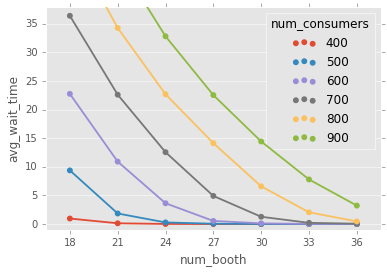

In [285]:
toll_data_df['num_booth'] = toll_data_df['num_service_booths']
ax = sns.pointplot(x='num_booth',
         y='avg_wait_time',
         hue='num_consumers', 
         data=toll_data_df.query('service_time==5'))
ax.set_ylim((-1,38))
#          color='b',

In [232]:
def quant(x):
    if x<1:
        return '<1'
    elif x<4:
        return '<4'
    elif x<10:
        return '<10'
    else:
        return '>10'
toll_data_df['wait_time'] = toll_data_df['avg_wait_time'].apply(quant)

In [239]:
toll_data_df

,avg_wait_time,max,num_consumers,num_service_booths,service_time,num_booth,wait_time
0,0.000000e+00,0.000000,400,18,1,18,<1
1,4.209223e-03,0.329276,400,18,3,18,<1
2,1.022970e+00,4.031123,400,18,5,18,<4
3,1.649541e+01,34.753452,400,18,7,18,>10
4,0.000000e+00,0.000000,500,18,1,18,<1
5,3.151380e-02,0.902544,500,18,3,18,<1
6,9.552419e+00,20.009788,500,18,5,18,<10
7,3.586393e+01,73.102397,500,18,7,18,>10
8,4.178708e-07,0.000183,600,18,1,18,<1
9,1.852620e-01,1.671332,600,18,3,18,<1


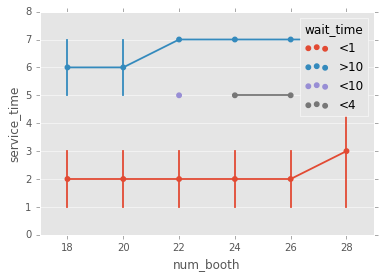

In [271]:
ax = sns.pointplot(x='num_booth',
             y='service_time',
             hue='wait_time',
             data=toll_data_df.query('num_consumers==600'),
              fit_reg=False)

In [251]:
toll_data_df.query('avg_wait_time<1')

,avg_wait_time,max,num_consumers,num_service_booths,service_time,num_booth,wait_time
0,0.000000e+00,0.000000,400,18,1,18,<1
1,4.209223e-03,0.329276,400,18,3,18,<1
4,0.000000e+00,0.000000,500,18,1,18,<1
5,3.151380e-02,0.902544,500,18,3,18,<1
8,4.178708e-07,0.000183,600,18,1,18,<1
9,1.852620e-01,1.671332,600,18,3,18,<1
12,1.974543e-06,0.000634,700,18,1,18,<1
16,1.056128e-05,0.004260,800,18,1,18,<1
20,6.272540e-05,0.022141,900,18,1,18,<1
24,0.000000e+00,0.000000,400,20,1,20,<1


### XKCD plot 

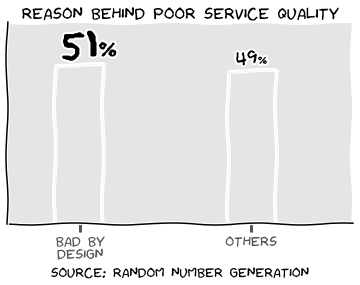

In [3]:
## Turn off ggplot in matplotlib and install humor sans as font
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
import numpy as np

with plt.xkcd():
#     # Based on "Stove Ownership" from XKCD by Randall Monroe
#     # http://xkcd.com/418/

#     fig = plt.figure()
#     ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')
#     plt.xticks([])
#     plt.yticks([])
#     ax.set_ylim([-30, 10])

#     data = np.ones(100)
#     data[70:] -= np.arange(30)

#     plt.annotate(
#         'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
#         xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

#     plt.plot(data)

#     plt.xlabel('time')
#     plt.ylabel('my overall health')
#     fig.text(
#         0.5, 0.05,
#         '"Stove Ownership" from xkcd by Randall Monroe',
#         ha='center')

#     # Based on "The Data So Far" from XKCD by Randall Monroe
#     # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([-0.05, 0.85], [55, 53], 0.25, color='none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0.08, 0.97])
    ax.set_xlim([-0.3, 1.5])
    ax.set_ylim([0, 70])
    ax.set_xticklabels(['BAD BY\nDESIGN', 'OTHERS'], size='x-large')
#     ax.text()
    plt.yticks([])

    plt.title("REASON BEHIND POOR SERVICE QUALITY", size=17)
    ax.text(-0.02, 59, '51%', fontsize=40)
    ax.text(0.89, 56, '49%', fontsize=20)
    fig.text(
        0.5, 0.02,
        'SOURCE: RANDOM NUMBER GENERATION',
        ha='center')

plt.show()